## RUNGE-KUTTA METHOD
Areebah Anzar

The equations of motion for the simple, non-linear pendulum are:  

$$
\begin{align}\begin{aligned}
\dot{\theta} &= \omega \,,\\ 
\dot{\omega} &= -\frac{g}{\ell}\sin\theta\,.
\end{aligned}\end{align}
$$  

Let's write these as  


$$
\begin{align}\begin{aligned}
\dot{\theta} &= f(\theta,\omega,t) \,,\\ 
\dot{\omega} &= h(\theta,\omega,t) \,.
\end{aligned}\end{align}
$$

The pendulum has length $\ell$, angle $\theta$ with respect to the vertical, angular velocity $\omega$, and gravitational acceleration at sea level is $g = 9.8$ m/s$^2$.

**Reminder**: Recall that the second order Runge-Kutta algorithm for solving $\dot x = f(x,t)$ is to loop the following sequence of steps:  
`k1 = dt*f(x,t)`  
`k2 = dt*f(x + 0.5*k1, t + 0.5*dt)`  
`x += k2`

## 1. Runge-Kutta for the simple pendulum

Fill in the code below for a function `time_and_angles(ell, theta_0)` that outputs three `numpy` arrays:  
1. an array of time points
2. an array of associated $\theta$ values
3. an array of associated $\omega$ values

In other words, the outputs of `time_and_angles(ell, theta_0)` are the required inputs for matplotlib/seaborn to plot the trajectory. Use the Runge-Kutta algorithm to integrate the differential equations. We'll use units such that `g = 9.8`.

We can treat this simple pendulum involving a *second order* differential equation in $\theta$ as a system of two *first order* differential equations: one for $\theta$ (dependent on the angular velocity $\omega$), and one for the angular velocity $\omega$ (which also depends on $\theta$).

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# CONSTANTS
g = 9.8

# PARAMETERS
ell = 1.0      # length of pendulum arm
theta_0 = 2.0  # initial displacement in radians
omega_0 = 0.0  # initial angular velocity
dt = 0.01      # time sampling spacing
t_final = 20.0 # total number of seconds 

def f(theta, omega, t):
    """d(theta)/dt"""
    return omega
    
def h(theta, omega, t):
    """d(omega)/dt"""
    return -(g/ell)*np.sin(theta)

# TIME POINTS (depends on dt and t_final)
tpoints = np.arange(0,t_final,dt)# FILL THIS IN (e.g. use np.arange)

def time_and_angles():
    """
    Returns three numpy arrays: 
    1. a list of time samples 
    2. a list of theta values
    3. a list of omega values
    No arguments (these are all assumed to be global variables)
    """
    
    theta_points = []
    omega_points = []
    
    # Initialize theta, omega
    theta = theta_0
    omega = omega_0
    
    for t in tpoints:
     
        # Time step using Runge-Kutta
        # FILL THIS IN, update theta and omega using RK2
    
       #do this for h and f:
       # k1 = dt*f(x,y,t)
       #k2 = dt*f(x + 0.5*k1,x + 0.5*k1f  t + 0.5*dt)
       # x += k2
        
        #k1 = dt*f(x,t)
        #k2 = dt*f(x + 0.5*k1, t + 0.5*dt)
        
        k1f = dt * f(theta,omega,t)
        k1h = dt * h(theta,omega,t)
       
        k2f = dt * f(theta + 0.5*k1f, omega + 0.5*k1h, t+ 0.5*dt)
        k2h = dt * h(theta + 0.5*k1f, omega + 0.5*k1h, t+ 0.5*dt)
        theta = theta + k2f
        omega = omega + k2h
        
        # Append theta, omega into theta_points and omega_points
        theta_points.append(theta)
        omega_points.append(omega)
    
    return np.array(tpoints), np.array(theta_points), np.array(omega_points)

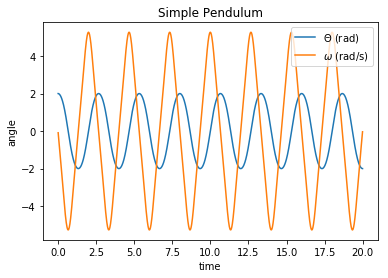

In [4]:
# Test the above code:
times, thetas, omegas = time_and_angles()

sns.lineplot(times, thetas, label='$\Theta$ (rad)')
sns.lineplot(times, omegas, label='$\omega$ (rad/s)')
plt.title("Simple Pendulum")
plt.xlabel('time')
plt.ylabel('angle')
plt.show()

Your code above should produce something like the following:

<img src="pendulum.png" width=500>

*Note*: You may also get something that doesn't look quite so periodic. If you're unsure, try working through the rest of the homework before returning to this plot.


## 2. Plotting the phase space trajectory
Plot the **phase space trajectory** of the simple pendulum over the range 0 to 10 seconds with the initial conditions above. A phase space diagram has $\theta$ on the horizontal axis and (angular) momentum on the vertical axis. You may assume that the pendulum weight has unit mass. 

Does the trajectory look periodic? The trajectory does look periodic

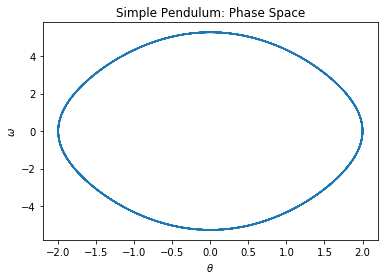

In [6]:
sns.lineplot(thetas,omegas, sort=False)
plt.title("Simple Pendulum: Phase Space")
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega$')
plt.show()

## 3. Plot of energy over time

The energy of the simple pendulum is  

$$ 
E = \frac{1}{2} m \ell^2 \omega^2 + m g \ell \left(1-\cos\theta\right)
$$

In [110]:
test_numpy_array=np.array([3.14,1.55])

print(np.cos(test_numpy_array))
print(test_numpy_array**2)

[-0.99999873  0.02079483]
[9.8596 2.4025]


Using the outputs of your code from Problem 1, create a numpy array of energy at each time step and plot energy as a function of time. 

What's happening to the energy as a function of time? Based on purely physical principles, what did you *expect* the plot of energy versus time to look like? Fill in your answer in the Markdown cell below.

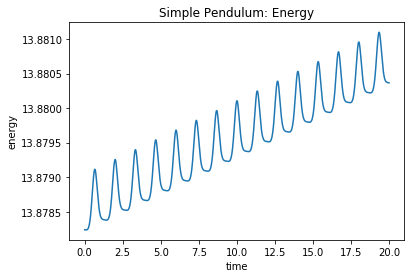

In [111]:
m = 1.0

# You may want to define a function to evaluate the energy for
# a given value of theta and omega
def energy(theta, omega):
    
    return (1/2*m*(ell**2)*(omega**2))+ (m*g*ell*(1-np.cos(theta)))


energies = np.array(energy(thetas,omegas))# FILL THIS IN using the omegas and thetas arrays

sns.lineplot(times, energies)
plt.title("Simple Pendulum: Energy")
plt.xlabel('time')
plt.ylabel('energy')
plt.show()

**ANSWER HERE**: What is happening to energy as a function of time in our system, and how does this compare to your physical expectations? It seems that the energy is linearly increasing when it should be constant because energy is conserved. 

## 4. Leapfrog method

The [leapfrog algorithm](https://en.wikipedia.org/wiki/Leapfrog_integration) works in the following way. First, the function value(s) half a time step away are determined by Euler's method

$$
x\left(t + \frac{\Delta t}{2}\right) = x(t) + \frac{\Delta t}{2} f(x(t), t)\,.
$$

Then, the function values are iteratively updated for whole time steps

$$
\begin{align} \begin{aligned}
x(t+\Delta t)            &= x(t) + \Delta t\; f\left(x\left(t+\frac{\Delta t}{2}\right), t + \frac{\Delta t}{2} \right)\,,\\
x\left(t+\frac{3\Delta t}{2}\right) &= x\left(t+\frac{\Delta t}{2}\right) + \Delta t\; f\left(x\left(t+\Delta t\right), t + \Delta t \right)\,.
\end{aligned} \end{align}
$$  

### 4.a. Coding the leapfrog algorithm

Fill in the code below and reproduce the plots in Problems 1, 2, and 3 using the leapfrog algorithm to integrate the simple, non-linear pendulum ODE.

In [112]:
def time_and_angles_leapfrog():
    """
    Returns three numpy arrays: 
    1. a list of time samples 
    2. a list of theta values
    3. a list of omega values
    No arguments (these are all assumed to be global variables)
    Uses leapfrog algorithm
    """
    
    theta_points = []
    omega_points = []
    
    # Initialize theta, omega
    theta = theta_0
    omega = omega_0
    theta_half = theta + 0.5*dt*f(theta, omega, 0)
    omega_half = omega + 0.5*dt*h(theta, omega, 0)
    
    for t in tpoints:
 
        # Append theta, omega to theta_points and omega_points
        theta_points.append(theta)
        omega_points.append(omega)


        # Time step using Leap-Frog 
        theta += dt*f(theta_half,omega_half,t+0.5*dt)
        omega += dt*h(theta_half,omega_half,t+0.5*dt)
          
        
        theta_half += dt*f(theta, omega, t + dt)
        omega_half += dt*h(theta, omega, t + dt)
        # NOTE: these depend on theta[i+1] and omega[i+1]
        

    return np.array(tpoints), np.array(theta_points), np.array(omega_points)

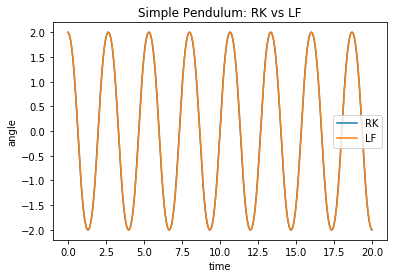

In [113]:
# Compare to the RK results: theta
times, thetas_lf, omegas_lf = time_and_angles_leapfrog()

sns.lineplot(times, thetas, label='RK')
sns.lineplot(times, thetas_lf, label='LF')
plt.title("Simple Pendulum: RK vs LF")
plt.xlabel('time')
plt.ylabel('angle')
plt.legend()
plt.show()

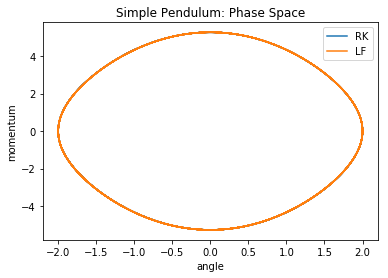

In [114]:
# Compare to the RK results: phase space

sns.lineplot(thetas, omegas, label='RK', sort=False)
sns.lineplot(thetas_lf, omegas_lf, label='LF', sort=False)
plt.title("Simple Pendulum: Phase Space")
plt.xlabel('angle')
plt.ylabel('momentum')
plt.legend()
plt.show()

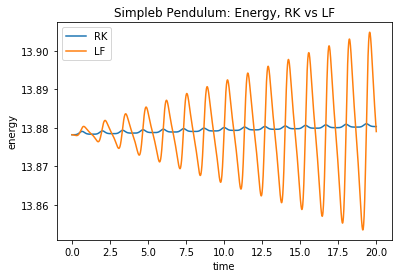

In [115]:
# Compare to the RK results: energy

m = 1.0

energies_lf = np.array(energy(thetas_lf, omegas_lf))

sns.lineplot(times, energies, label='RK')
sns.lineplot(times, energies_lf, label='LF')
plt.title("Simpleb Pendulum: Energy, RK vs LF")
plt.xlabel('time')
plt.ylabel('energy')
plt.show()

### 4.b. Assessing the results

How does your plot of time versus energy compare between the Runge-Kutta and leapfrog algorithms? In this case, which algorithm would you probably want to use if you wanted to integrate this equation for a long time? To make the difference a little more clear, you might consider integrating up to a later time by setting `t_final = 20.` or higher. Explain your reasoning in the Markdown cell below.

**FILL THIS IN**: For the system above, which algorithm would you use, and why? I would use the runge-kuuta method because it accurately displays the actual behavior of energy in a pendulum which is near constant. The leap frod method shows increasing energies which is due to errors since the energy must be constant. 

It's important to keep in mind that the results we've observed are actually **parameter-dependent**. Consider rerunning the code you've written above, but set `theta_0 = 2.0` in the first code cell. Now the performance is different. This emphasizes an important point: with computational work, we should always examine the output of our code carefully, beyond the direct question we want to answer.